# Data Visualization

Data visualization is an important part of data exploration.

When it comes to data visualization libraries, there are several Python-based options to choose from, including: 
- [Matplotlib](https://matplotlib.org/) 
- [Seaborn](https://seaborn.pydata.org/)
- [Altair](https://altair-viz.github.io/getting_started/overview.html)
- [Vega](https://vega.github.io/vega/)
- [Bokeh](https://bokeh.org/)
- [Plotly](https://plotly.com/) 

<img width="70%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/data_viz_libraries.png"/> 


The first two libraries, Matplotlib and Seaborn, are the most popular ones. Matplotlib is the original old-school data visualization library, and Seaborn is a wrapper that is built off of it. Seaborn is specifically designed to work with Pandas DataFrames.  

In this chapter, we'll focus on **Seaborn** plots and learn how to customize them using **Matplotlib**.  

### Importing dependencies

Seaborn is usually given the alias `sns` while Matplotlib is often referenced as `plt`. Let's import those libraries along with Pandas. 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

Let's read in our newly cleaned dataset which we created in [Chapter 3](./03_cleaning_data.ipynb):

In [2]:
df = pd.read_csv("data/nyc_real_estate_clean.csv")

## Plotting Distributions

Seaborn offers several plot functions that help visualize the distribution of a numerical variable. Distributions can provide a lot of useful information about your data like whether it is postively or negatively skewed or normally distributed. Let's test out the following distribution plots with Seaborn:
1. [Histogram](content:#histogram)
2. [Kernel density estimate (KDE) Plot](content:#kernel-density-estimate-plot)
3. [Boxplot](content:#boxplot)
4. [Violinplot](content:#violinplot)

### Histogram

Seaborn's [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) function provides a simple histogram view of your data. The two inputs that you need to specify are 1) `x` and 2) `data`. 

<AxesSubplot:xlabel='year_built', ylabel='Count'>

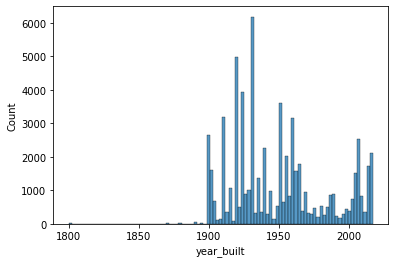

In [3]:
sns.histplot(x='year_built', data=df)

### Kernel Density Estimate Plot

Similar to the histogram, Seaborn's [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function gives you a high-level view of where the data is most and least concentrated. 

<AxesSubplot:xlabel='year_built', ylabel='Density'>

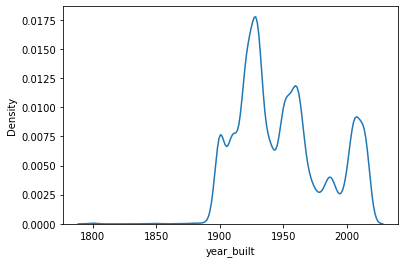

In [4]:
sns.kdeplot(x='year_built', data=df)

### Boxplot 

If you'd like to understand the median and interquartile range of a continuous variable, Seaborn's [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) is a great option. It's set up the same as the histplot and kdeplot such that you only need to specify the `x` and `data` parameters.

<AxesSubplot:xlabel='year_built'>

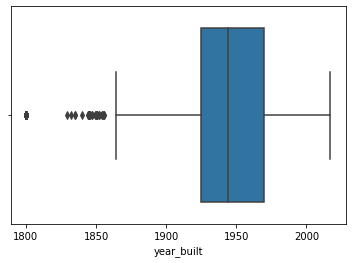

In [5]:
sns.boxplot(x='year_built', data=df)

### Violin Plot 

Seaborn's [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) is an interesting variation of the boxplot. It combines information from a kernel density estimate and boxplot into one visualization. The white dot represents the median and the black bar represents the interquartile range. The outline of the violin plot represents the kernel density estimate which gives you a sense of the general distribution of the data. 

Does a violin plot look like a violin? Hard to say. It certainly does look artsy and interesting. 

<AxesSubplot:xlabel='year_built'>

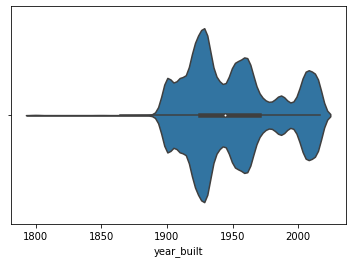

In [6]:
sns.violinplot(x='year_built', data=df)

If you want to segment your continuous variable by category, you can use the `x` and `y` parameters to find both your continuous and categorical variables.

<AxesSubplot:xlabel='borough', ylabel='year_built'>

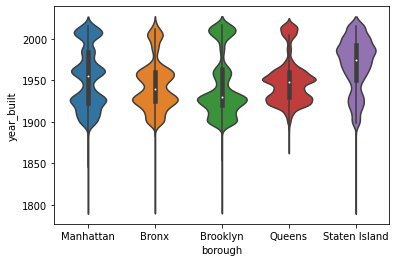

In [7]:
sns.violinplot(x='borough', y='year_built', data=df)

## Plotting Categorical Data

### Countplot

<AxesSubplot:xlabel='borough', ylabel='count'>

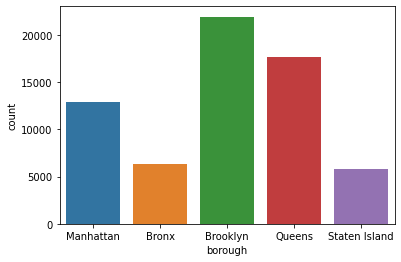

In [8]:
sns.countplot(x='borough', data=df)

### Barplot

<AxesSubplot:xlabel='borough', ylabel='sale_price'>

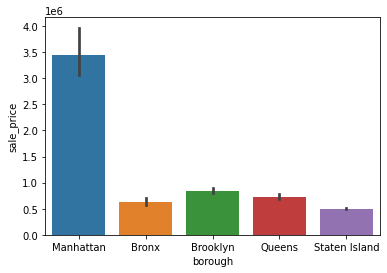

In [9]:
sns.barplot(x='borough', y='sale_price', data=df)

## Plotting Numerical Data

Let's say you wanted to visualize the relationship between two continuous variables. You can use a scatterplot to do this. Seaborn's [scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot) function has an `x` and `y` parameter that you need to specify. Here, we'll look at gross square feet versus sale price and filter for properties that were sold below one billion dollars. 

<AxesSubplot:xlabel='gross_square_feet', ylabel='sale_price'>

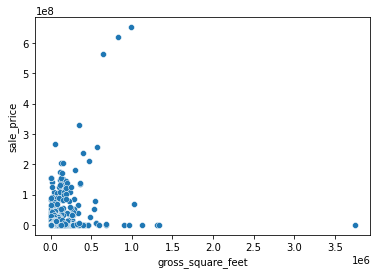

In [10]:
sns.scatterplot(x='gross_square_feet', y='sale_price', data=df[df['sale_price']<10**9])

### Plotting Time-series Data

There are instances where you might need to aggregate your data before plotting. For example, if we wanted to plot the number of properties sold by sale date, we would need to transform the data so that we can easily fetch the property count for a given date. 

Let's plot number of sales over time. We can group our data by `sale_date` so that we get one row per day.

In [11]:
sale_date_count = df.groupby('sale_date').size().reset_index(name='count')
sale_date_count['sale_date'] = pd.to_datetime(sale_date_count['sale_date'])
sale_date_count.head()

,sale_date,count
0,2016-09-01,296
1,2016-09-02,140
2,2016-09-03,4
3,2016-09-05,2
4,2016-09-06,191


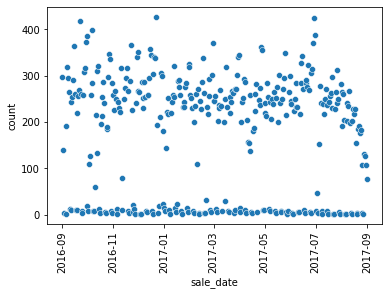

In [12]:
sns.scatterplot(x='sale_date', y='count', data=sale_date_count)
plt.xticks(rotation=90)
plt.show()

In [13]:
sale_date_count = df.groupby('sale_date').size().reset_index(name='count')

When plotting time-series data, it's important to make sure the date field is a datetime datatype. You can convert it to datetime using the to_datetime() function like this:

## Customizing Plots

Seaborn is a wrapper of Matplotlib so you can combine Matplotlib functionality with Seaborn plots. This is particularly useful when you want to customize plots. There are so many ways that you can customize a Seaborn plot. Here, we'll walk through four types of customizations:

1. Axis labels
2. Color palettes
3. Plot size
4. Combining multiple plots

### Axis Labels

To update the `x` and `y` axis labels of your plot, you can use:
- [plt.xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)
- [plt.ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)

Let's revisit the barplot that we created earlier:

<AxesSubplot:xlabel='borough', ylabel='sale_price'>

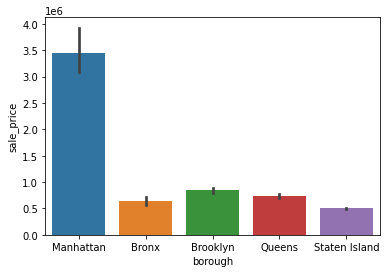

In [14]:
sns.barplot(x='borough', y='sale_price', data=df)

Let's custom the labels in three ways:
- remove the x-axis label
- change the y-axis label from "sale_price" to "sale price"
- add a plot title 

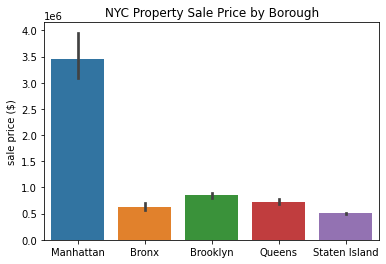

In [15]:
sns.barplot(x='borough', y='sale_price', data=df)
plt.xlabel('')
plt.ylabel('sale price ($)')
plt.title('NYC Property Sale Price by Borough')
plt.show()

Awesome! I think these labels make the plot look much nicer. 

### Color Palettes

A fun way to make your plot stand out is by switching up the color palettes. Most Seaborn plot functions have a `palette` arugment that lets you specify a color palette of your choosing. Refer to the [Seaborn Color Palette page](./AP_seaborn_palette.ipynb) in the appendix for more inforamtion on available palettes. 

Here's what our barplot looks like using the "Blues" palette. 

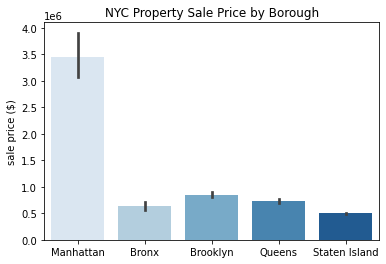

In [16]:
sns.barplot(x='borough', y='sale_price', data=df, palette='Blues')
plt.xlabel('')
plt.ylabel('sale price ($)')
plt.title('NYC Property Sale Price by Borough')
plt.show()

This is what the "viridis" palette looks like:

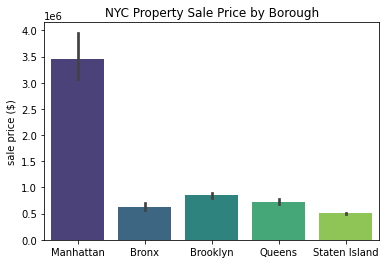

In [17]:
sns.barplot(x='borough', y='sale_price', data=df, palette='viridis')
plt.xlabel('')
plt.ylabel('sale price ($)')
plt.title('NYC Property Sale Price by Borough')
plt.show()

### Plot Size

Want to make your plot smaller or larger than the default? No problem! [plt.figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) is what you're looking for. You can change the dimensions of your plot using the `figsize` argument. Remember that the dimensions are formatted like this: `(width, height)`.

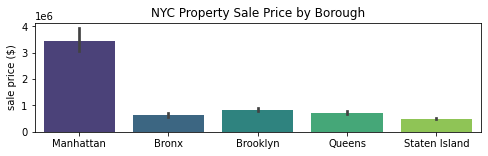

In [18]:
plt.figure(figsize=(8,2))
sns.barplot(x='borough', y='sale_price', data=df, palette='viridis')
plt.xlabel('')
plt.ylabel('sale price ($)')
plt.title('NYC Property Sale Price by Borough')
plt.show()

We stretched the plot above by specify the width:height ratio to 8:2. You can play around with these dimensions to see how different ratios look. 

### Combining Multiple Plots 

Let's say you want to combine two plots side by side. A nice feature of Matplotlib is the [plt.subplot()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) function that allows you to create a grid of plots in a single plot frame. If you're looking to combine two plots, you will need to declare `plt.subplot()` above each plot. Inside the subplot function, you will need to define 1) the dimensions of your plot grid, and 2) the location of your plot, following this format:

```
plt.subplot(n_rows, n_columns, plot_location)
```

Here's an example of how this would look:

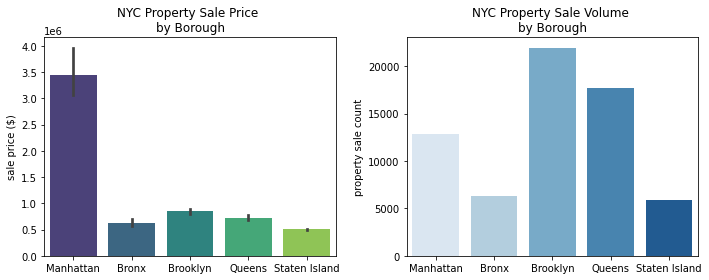

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='borough', y='sale_price', data=df, palette='viridis')
plt.xlabel('')
plt.ylabel('sale price ($)')
plt.title('NYC Property Sale Price \nby Borough')

plt.subplot(1,2,2)
sns.countplot(x='borough', data=df, palette='Blues')
plt.xlabel('')
plt.ylabel('property sale count')
plt.title('NYC Property Sale Volume \nby Borough')
plt.tight_layout()

[plt.tight_layout()](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html) is a nice touch to make sure that your grid of plots is properly formatted without any overlap.